     appid                                               name  \
0  1661900  Human Apocalypse - Reverse Horror Zombie Indie...   
1   292000                             No More Room In Hell 2   
2   108600                                    Project Zomboid   
3  1456940                                            Level Z   
4  1809540                                          Nine Sols   

           developer             publisher  score_rank  positive  negative  \
0  Euphoric Brothers     Euphoric Brothers         NaN        50        17   
1        Lever Games           Lever Games         NaN         0         0   
2    The Indie Stone       The Indie Stone         NaN    281805     17554   
3      DogHowl Games  Creative Black Chair         NaN         0         0   
4     RedCandleGames        RedCandleGames         NaN      4343       283   

   userscore                    owners  average_forever  average_2weeks  \
0          0               0 .. 20,000                0          

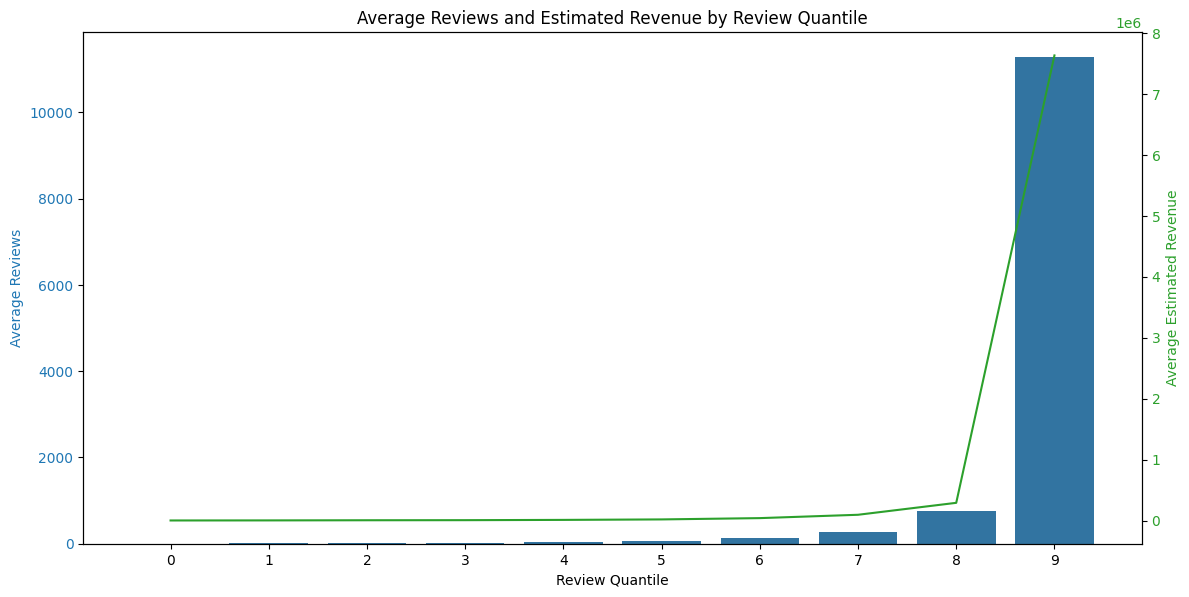

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Display the first few rows of the dataframe to understand its structure
print(games_df.head())

# Data Cleaning
# Drop rows with missing values in positive, negative, or price columns
games_df.dropna(subset=['positive', 'negative', 'price'], inplace=True)

# Convert relevant columns to appropriate data types
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)

# Ensure price is in the correct units (dollars instead of cents)
games_df['price'] = games_df['price'] / 100  # Assuming price is in cents, convert to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']

# Filter out rows where reviews are zero
games_df = games_df[games_df['reviews'] > 0]

# Assume 2% of buyers leave a review, so the factor is 50
review_factor = 50

# Estimate revenue
games_df['estimated_revenue'] = games_df['reviews'] * review_factor * games_df['price']

# Check for unique values in the reviews column
unique_reviews = games_df['reviews'].nunique()
print(f"Unique review values: {unique_reviews}")

# Data Analysis
# Reduce the number of quantiles if there are not enough unique values
num_quantiles = min(10, unique_reviews)

# Calculate quantiles for reviews and estimated revenue
if num_quantiles > 1:
    games_df['review_quantile'] = pd.qcut(games_df['reviews'], num_quantiles, labels=False, duplicates='drop')
    games_df['revenue_quantile'] = pd.qcut(games_df['estimated_revenue'], num_quantiles, labels=False, duplicates='drop')

    # Group by review quantile and calculate statistics
    review_stats = games_df.groupby('review_quantile').agg({
        'reviews': ['mean', 'median'],
        'estimated_revenue': ['mean', 'median'],
        'price': ['mean', 'median']
    }).reset_index()

    review_stats.columns = ['review_quantile', 'mean_reviews', 'median_reviews', 'mean_estimated_revenue', 'median_estimated_revenue', 'mean_price', 'median_price']

    # Display the statistics
    print(review_stats)

    # Data Visualization
    # Plot average reviews and estimated revenue by review quantile
    fig, ax1 = plt.subplots(figsize=(12, 6))

    color = 'tab:blue'
    ax1.set_xlabel('Review Quantile')
    ax1.set_ylabel('Average Reviews', color=color)
    sns.barplot(x=review_stats['review_quantile'], y=review_stats['mean_reviews'], ax=ax1, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Average Estimated Revenue', color=color)
    sns.lineplot(x=review_stats['review_quantile'], y=review_stats['mean_estimated_revenue'], ax=ax2, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Average Reviews and Estimated Revenue by Review Quantile')
    plt.show()
else:
    print("Not enough unique review values to create quantiles.")



     appid                                               name  \
0  1661900  Human Apocalypse - Reverse Horror Zombie Indie...   
1   292000                             No More Room In Hell 2   
2   108600                                    Project Zomboid   
3  1456940                                            Level Z   
4  1809540                                          Nine Sols   

           developer             publisher  score_rank  positive  negative  \
0  Euphoric Brothers     Euphoric Brothers         NaN        50        17   
1        Lever Games           Lever Games         NaN         0         0   
2    The Indie Stone       The Indie Stone         NaN    281805     17554   
3      DogHowl Games  Creative Black Chair         NaN         0         0   
4     RedCandleGames        RedCandleGames         NaN      4343       283   

   userscore                    owners  average_forever  average_2weeks  \
0          0               0 .. 20,000                0          

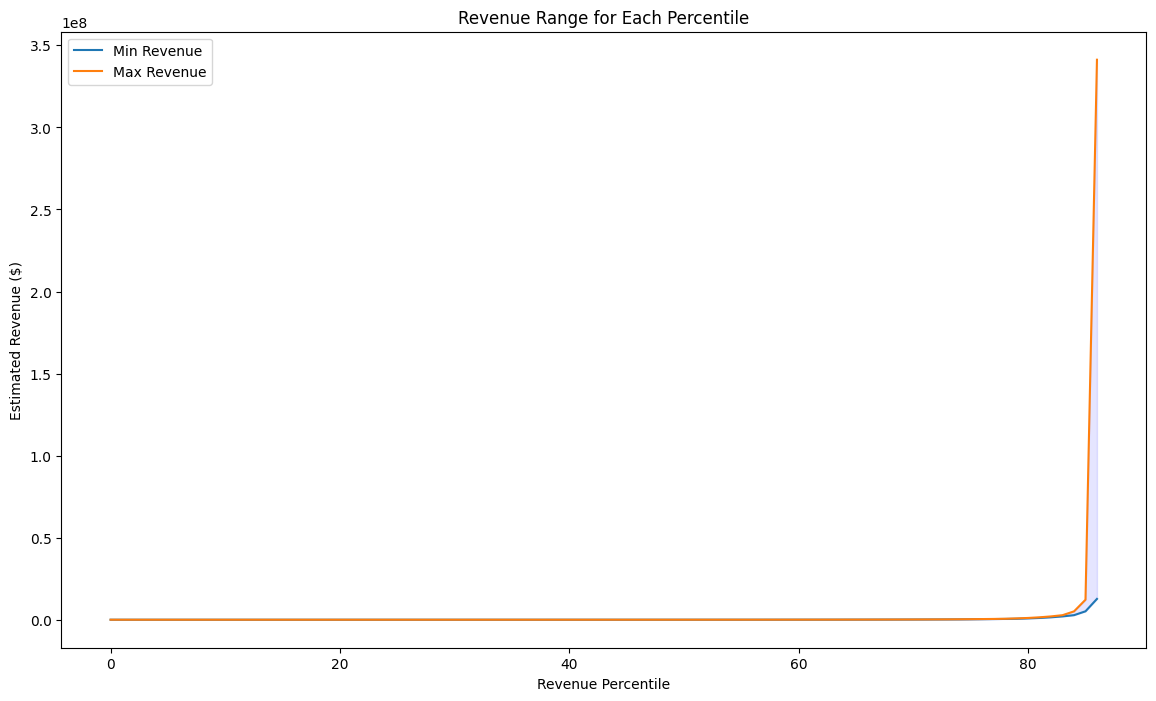

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Display the first few rows of the dataframe to understand its structure
print(games_df.head())

# Data Cleaning
# Drop rows with missing values in positive, negative, or price columns
games_df.dropna(subset=['positive', 'negative', 'price'], inplace=True)

# Convert relevant columns to appropriate data types
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)

# Ensure price is in the correct units (dollars instead of cents)
games_df['price'] = games_df['price'] / 100  # Assuming price is in cents, convert to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']

# Filter out rows where reviews are zero
games_df = games_df[games_df['reviews'] > 0]

# Assume 2% of buyers leave a review, so the factor is 50
review_factor = 50

# Estimate revenue
games_df['estimated_revenue'] = games_df['reviews'] * review_factor * games_df['price']

# Check for unique values in the reviews column
unique_reviews = games_df['reviews'].nunique()
print(f"Unique review values: {unique_reviews}")

# Data Analysis
# Calculate quantiles for estimated revenue
num_quantiles = 100  # Divide into percentiles
games_df['revenue_percentile'] = pd.qcut(games_df['estimated_revenue'], num_quantiles, labels=False, duplicates='drop')

# Group by revenue percentile and calculate the revenue range (min and max)
revenue_range = games_df.groupby('revenue_percentile')['estimated_revenue'].agg(['min', 'max']).reset_index()

# Convert revenue range to full numbers
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))

# Display the revenue range for each percentile
print(revenue_range)

# Data Visualization
# Plot the revenue range for each percentile
plt.figure(figsize=(14, 8))
sns.lineplot(data=revenue_range, x='revenue_percentile', y='min', label='Min Revenue')
sns.lineplot(data=revenue_range, x='revenue_percentile', y='max', label='Max Revenue')
plt.fill_between(revenue_range['revenue_percentile'], revenue_range['min'], revenue_range['max'], color='blue', alpha=0.1)
plt.title('Revenue Range for Each Percentile')
plt.xlabel('Revenue Percentile')
plt.ylabel('Estimated Revenue ($)')
plt.legend()
plt.show()


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Display the first few rows of the dataframe to understand its structure
print(games_df.head())

# Data Cleaning
# Drop rows with missing values in positive, negative, or price columns
games_df.dropna(subset=['positive', 'negative', 'price'], inplace=True)

# Convert relevant columns to appropriate data types
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)

# Ensure price is in the correct units (dollars instead of cents)
games_df['price'] = games_df['price'] / 100  # Assuming price is in cents, convert to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']

# Filter out rows where reviews are zero
games_df = games_df[games_df['reviews'] > 0]

# Assume 2% of buyers leave a review, so the factor is 50
review_factor = 50

# Estimate revenue
games_df['estimated_revenue'] = games_df['reviews'] * review_factor * games_df['price']

# Filter out rows where estimated revenue is zero
games_df = games_df[games_df['estimated_revenue'] > 0]

# Check for unique values in the reviews column
unique_reviews = games_df['reviews'].nunique()
print(f"Unique review values: {unique_reviews}")

# Data Analysis
# Reduce the number of quantiles if there are not enough unique values
num_quantiles = min(10, unique_reviews)

# Calculate quantiles for reviews
games_df['review_quantile'] = pd.qcut(games_df['reviews'], num_quantiles, labels=False, duplicates='drop')

# Group by review quantile and calculate the revenue range (min and max)
revenue_range = games_df.groupby('review_quantile')['estimated_revenue'].agg(['min', 'max']).reset_index()

# Convert revenue range to full numbers and format as strings
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)


# Optionally, print each range individually
for index, row in revenue_range.iterrows():
    print(f"Review Quantile {row['review_quantile']}: {row['range']}")


     appid                                  name              developer  \
0  1943950                  Escape the Backrooms            Fancy Games   
1   732690  FIVE NIGHTS AT FREDDY'S: HELP WANTED     Steel Wool Studios   
2   962400                                Granny                DVloper   
3   503580                           Duck Season      Stress Level Zero   
4   475190                        Scanner Sombre  Introversion Software   

               publisher  score_rank  positive  negative  userscore  \
0            Fancy Games         NaN     66105      6739          0   
1             ScottGames         NaN     11332       451          0   
2                DVloper         NaN      2900       259          0   
3      Stress Level Zero         NaN      1210       220          0   
4  Introversion Software         NaN      3269       393          0   

                   owners  average_forever  average_2weeks  median_forever  \
0  2,000,000 .. 5,000,000              489  

Unique review values: 977
Review Quantile 0: $30 - $3,998
Review Quantile 1: $225 - $39,996
Review Quantile 2: $245 - $149,992
Review Quantile 3: $238 - $189,990
Review Quantile 4: $612 - $339,983
Review Quantile 5: $812 - $85,472
Review Quantile 6: $2,009 - $202,432
Review Quantile 7: $4,312 - $2,956,390
Review Quantile 8: $8,869 - $1,560,980
Review Quantile 9: $62,222 - $341,240,604


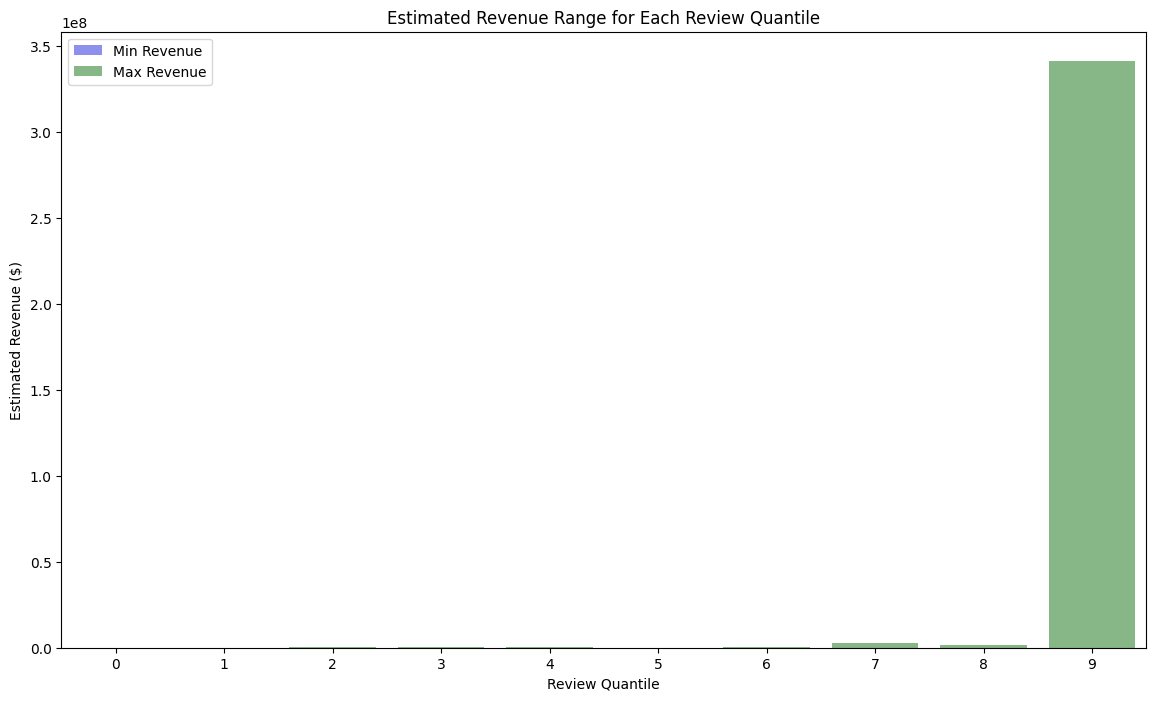

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']
games_df = games_df[games_df['reviews'] > 0]

# Assume 2% of buyers leave a review, so the factor is 50
review_factor = 50

# Estimate revenue
games_df['estimated_revenue'] = games_df['reviews'] * review_factor * games_df['price']
games_df = games_df[games_df['estimated_revenue'] > 0]

# Check the number of unique review counts
unique_reviews = games_df['reviews'].nunique()
print(f"Unique review values: {unique_reviews}")

# Adjust the number of quantiles based on unique review counts
num_quantiles = min(10, unique_reviews)
games_df['review_quantile'] = pd.qcut(games_df['reviews'], num_quantiles, labels=False, duplicates='drop')

# Calculate the revenue range for each quantile
revenue_range = games_df.groupby('review_quantile')['estimated_revenue'].agg(['min', 'max']).reset_index()
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)

# Print each range individually
for index, row in revenue_range.iterrows():
    print(f"Review Quantile {row['review_quantile']}: {row['range']}")

# Visualize the revenue range
plt.figure(figsize=(14, 8))
sns.barplot(x=revenue_range['review_quantile'], y=revenue_range['min'], color='blue', alpha=0.5, label='Min Revenue')
sns.barplot(x=revenue_range['review_quantile'], y=revenue_range['max'], color='green', alpha=0.5, label='Max Revenue')
plt.xlabel('Review Quantile')
plt.ylabel('Estimated Revenue ($)')
plt.title('Estimated Revenue Range for Each Review Quantile')
plt.legend()
plt.show()



Top 10 publishers by number of games:
publisher
SignSine                      2
YGGDRAZIL GROUP CO.,LTD       2
OnSkull Games                 2
Introversion Software         2
Krillbite Studio              2
MAD Virtual Reality Studio    2
The Shady Gentlemen           2
Wales Interactive             2
SilentFuture                  1
Anime fashion show            1
Name: count, dtype: int64

Top 10 publishers by number of positive reviews:
publisher
Fancy Games                66105
ScottGames                 11332
HFM Games                   8591
Blue Isle Publishing        7728
Krillbite Studio            6302
Introversion Software       4811
Funcom                      4217
YGGDRAZIL GROUP CO.,LTD     4077
DVloper                     2900
Albino Moose Games          2686
Name: positive, dtype: int64


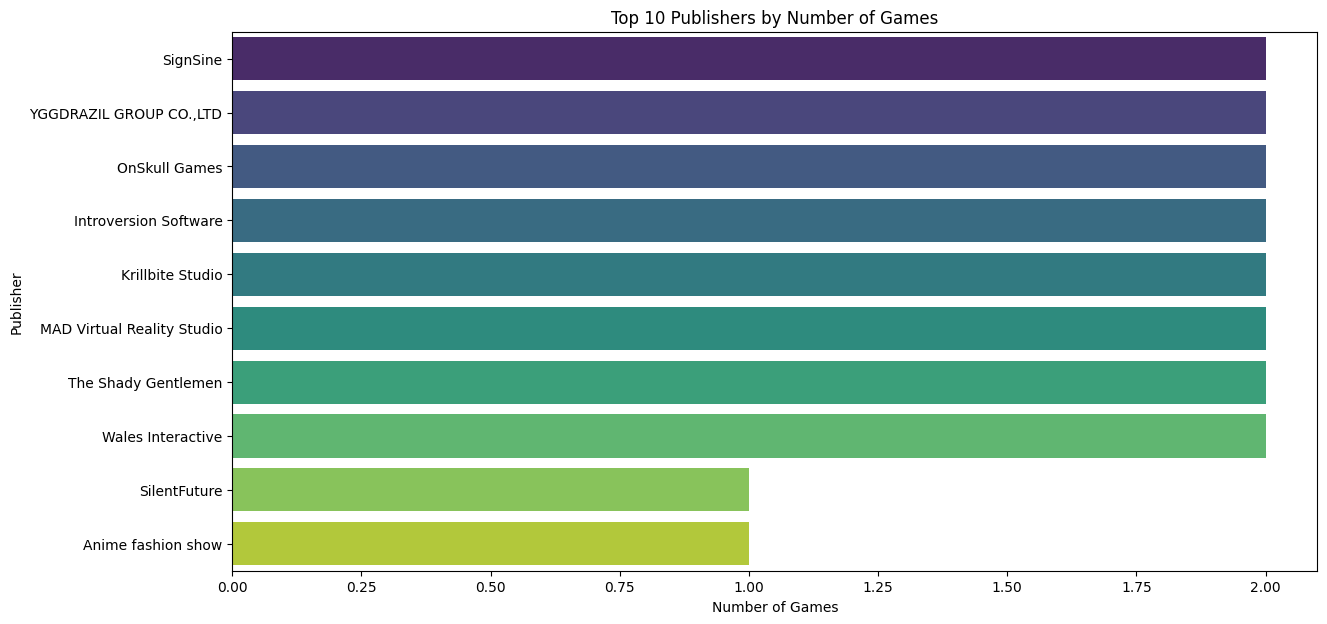

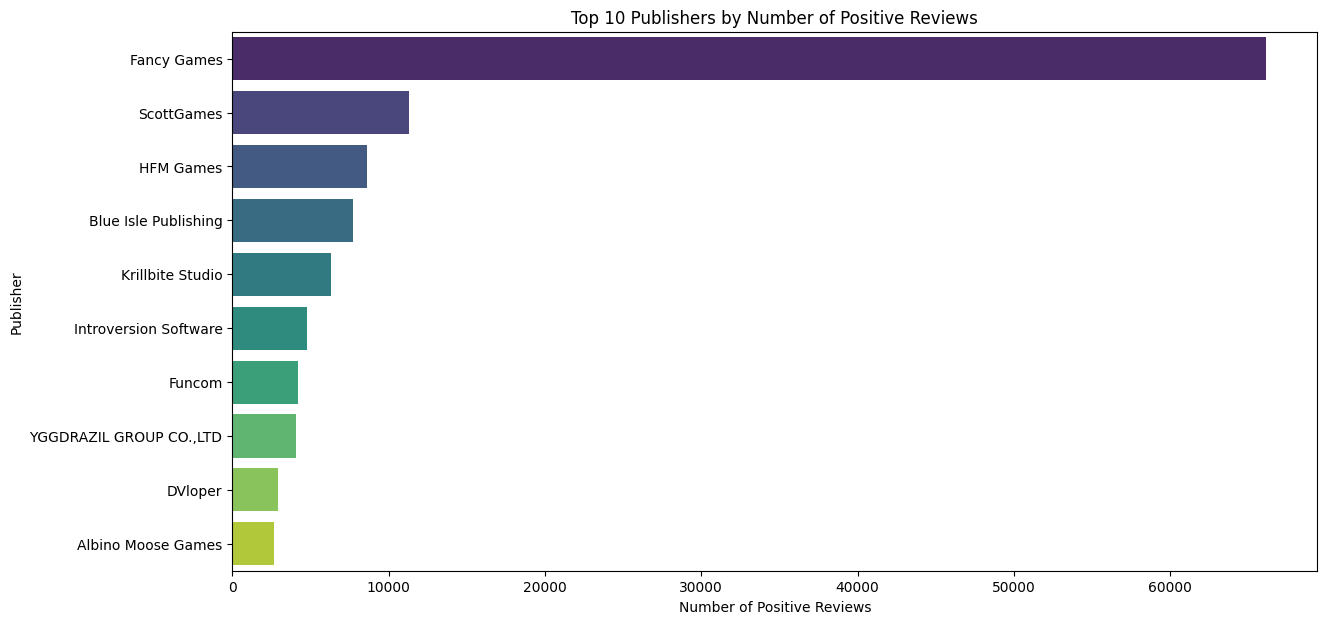

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data
data_dir = '../data'
games_df = pd.read_csv(os.path.join(data_dir, 'indie_horror_games_data.csv'))

# Analyze publishers by number of games published
publisher_counts = games_df['publisher'].value_counts()
top_publishers = publisher_counts.head(10)

print("Top 10 publishers by number of games:")
print(top_publishers)

# Analyze publishers by success (using positive reviews as a proxy for success)
publisher_success = games_df.groupby('publisher')['positive'].sum().sort_values(ascending=False).head(10)

print("\nTop 10 publishers by number of positive reviews:")
print(publisher_success)

# Plot the top 10 publishers by number of games published
plt.figure(figsize=(14, 7))
sns.barplot(x=top_publishers.values, y=top_publishers.index, hue=top_publishers.index, dodge=False, palette="viridis", legend=False)
plt.title('Top 10 Publishers by Number of Games')
plt.xlabel('Number of Games')
plt.ylabel('Publisher')
plt.show()

# Plot the top 10 publishers by number of positive reviews
plt.figure(figsize=(14, 7))
sns.barplot(x=publisher_success.values, y=publisher_success.index, hue=publisher_success.index, dodge=False, palette="viridis", legend=False)
plt.title('Top 10 Publishers by Number of Positive Reviews')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('Publisher')
plt.show()

# Save the analysis results
top_publishers.to_csv(os.path.join(data_dir, 'top_publishers_by_games.csv'))
publisher_success.to_csv(os.path.join(data_dir, 'top_publishers_by_success.csv'))


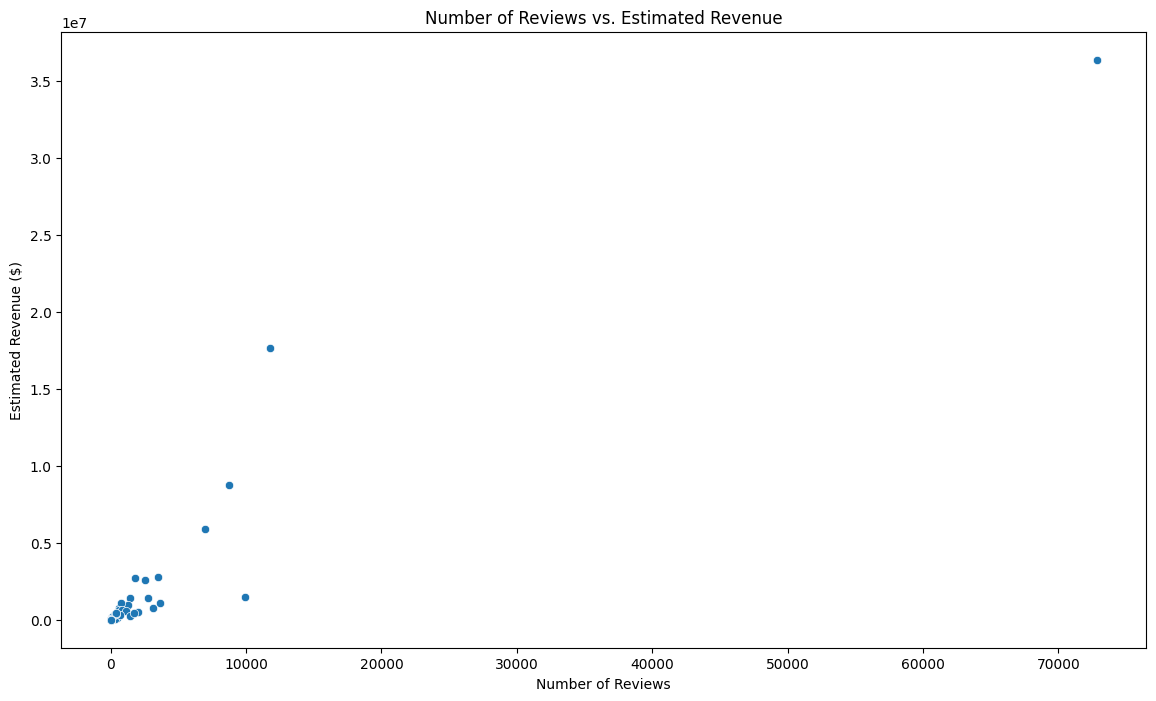

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']
games_df = games_df[games_df['reviews'] > 0]

# Assume 2% of buyers leave a review, so the factor is 50
review_factor = 50

# Estimate revenue
games_df['estimated_revenue'] = games_df['reviews'] * review_factor * games_df['price']
games_df = games_df[games_df['estimated_revenue'] > 0]

# Scatter plot of reviews vs. estimated revenue
plt.figure(figsize=(14, 8))
sns.scatterplot(x=games_df['reviews'], y=games_df['estimated_revenue'])
plt.xlabel('Number of Reviews')
plt.ylabel('Estimated Revenue ($)')
plt.title('Number of Reviews vs. Estimated Revenue')
plt.show()


Unique review values: 1115

Review Percentage: 1.0%
Bottom 10%: $59 - $7,996
Bottom 20%: $450 - $79,992
Bottom 30%: $490 - $299,985
Bottom 40%: $476 - $379,981
Bottom 50%: $1,225 - $679,966
Bottom 60%: $1,624 - $170,943
Top 40%: $4,018 - $404,865
Top 30%: $8,624 - $5,912,781
Top 20%: $17,738 - $3,121,959
Top 10%: $124,443 - $682,481,209

Review Percentage: 2.0%
Bottom 10%: $30 - $3,998
Bottom 20%: $225 - $39,996
Bottom 30%: $245 - $149,992
Bottom 40%: $238 - $189,990
Bottom 50%: $612 - $339,983
Bottom 60%: $812 - $85,472
Top 40%: $2,009 - $202,432
Top 30%: $4,312 - $2,956,390
Top 20%: $8,869 - $1,560,980
Top 10%: $62,222 - $341,240,604

Review Percentage: 5.0%
Bottom 10%: $12 - $1,599
Bottom 20%: $90 - $15,998
Bottom 30%: $98 - $59,997
Bottom 40%: $95 - $75,996
Bottom 50%: $245 - $135,993
Bottom 60%: $325 - $34,189
Top 40%: $804 - $80,973
Top 30%: $1,725 - $1,182,556
Top 20%: $3,548 - $624,392
Top 10%: $24,889 - $136,496,242


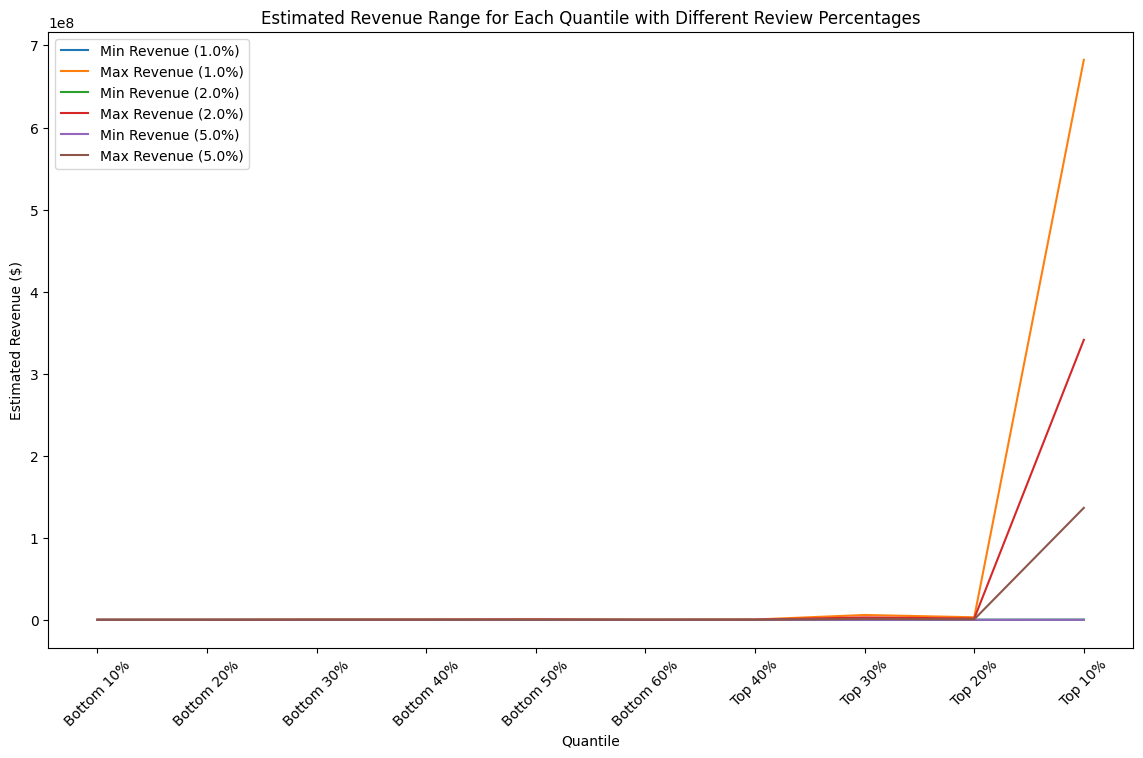

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']

# Filter out games with zero reviews
games_df = games_df[games_df['reviews'] > 0]

# Get the number of unique review values
unique_reviews = games_df['reviews'].nunique()
print(f"Unique review values: {unique_reviews}")

# Test different review percentages
review_percentages = [0.01, 0.02, 0.05]
results = {}

for review_percentage in review_percentages:
    review_factor = 1 / review_percentage
    games_df['estimated_revenue'] = games_df['reviews'] * review_factor * games_df['price']
    
    # Filter out games with zero estimated revenue
    games_df = games_df[games_df['estimated_revenue'] > 0]
    
    # Calculate review quantiles
    num_quantiles = min(10, unique_reviews)
    quantile_labels = [f"Bottom {i*10}%" for i in range(1, 7)] + [f"Top {(11-i)*10}%" for i in range(7, 11)]
    games_df['review_quantile'] = pd.qcut(games_df['reviews'], num_quantiles, labels=quantile_labels, duplicates='drop')

    # Calculate the revenue range for each quantile
    revenue_range = games_df.groupby('review_quantile', observed=True)['estimated_revenue'].agg(['min', 'max']).reset_index()
    revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
    revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
    revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)
    
    results[review_percentage] = revenue_range

# Print results for each review percentage
for review_percentage, revenue_range in results.items():
    print(f"\nReview Percentage: {review_percentage * 100}%")
    for index, row in revenue_range.iterrows():
        print(f"{row['review_quantile']}: {row['range']}")

# Visualize the results
plt.figure(figsize=(14, 8))
for review_percentage, revenue_range in results.items():
    plt.plot(revenue_range['review_quantile'], revenue_range['min'], label=f'Min Revenue ({review_percentage * 100}%)')
    plt.plot(revenue_range['review_quantile'], revenue_range['max'], label=f'Max Revenue ({review_percentage * 100}%)')

plt.xlabel('Quantile')
plt.ylabel('Estimated Revenue ($)')
plt.title('Estimated Revenue Range for Each Quantile with Different Review Percentages')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']

# Filter out games with zero reviews
games_df = games_df[games_df['reviews'] > 0]

# Replace non-numeric values in the owners column with NaN and extract the upper limit of the range
games_df['owners'] = games_df['owners'].str.extract(r'(\d+,*\d*)$')[0].str.replace(',', '').astype(float)

# Drop rows with missing values in owners column
games_df = games_df.dropna(subset=['owners'])
games_df = games_df[games_df['owners'] > 0]

# Calculate the ratio of reviews to downloads
games_df['review_to_download_ratio'] = games_df['reviews'] / games_df['owners']

# Calculate the average review-to-download ratio
average_ratio = games_df['review_to_download_ratio'].mean()
print(f"Average review-to-download ratio: {average_ratio}")

# Use this average ratio to estimate the number of downloads more accurately
games_df['estimated_downloads'] = games_df['reviews'] / average_ratio

# Estimate revenue using the more accurate number of downloads
games_df['estimated_revenue'] = games_df['estimated_downloads'] * games_df['price']

# Calculate revenue quantiles
num_quantiles = 10

# Use qcut to create the quantiles, capturing the actual bin edges
games_df['revenue_quantile'], bins = pd.qcut(games_df['estimated_revenue'], num_quantiles, labels=False, retbins=True)

# Create appropriate labels
actual_num_bins = len(bins) - 1
quantile_labels = [f"{i*10}-{(i+1)*10}%" for i in range(actual_num_bins)]
games_df['revenue_quantile'] = pd.qcut(games_df['estimated_revenue'], actual_num_bins, labels=quantile_labels)

# Calculate the revenue range for each quantile
revenue_range = games_df.groupby('revenue_quantile', observed=True)['estimated_revenue'].agg(['min', 'max']).reset_index()
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)

# Print results for each revenue quantile
print("\nEstimated Revenue Ranges for Each Quantile:")
for index, row in revenue_range.iterrows():
    print(f"{row['revenue_quantile']}: {row['range']}")

# Visualize the results
plt.figure(figsize=(14, 8))
sns.barplot(x=revenue_range['revenue_quantile'], y=revenue_range['min'], color='blue', alpha=0.5, label='Min Revenue')
sns.barplot(x=revenue_range['revenue_quantile'], y=revenue_range['max'], color='green', alpha=0.5, label='Max Revenue')
plt.xlabel('Revenue Quantile')
plt.ylabel('Estimated Revenue ($)')
plt.title('Estimated Revenue Range for Each Revenue Quantile')
plt.xticks(rotation=45)
plt.legend()
plt.show()




Average review-to-download ratio: 0.004500736808374279


ValueError: Bin edges must be unique: Index([               0.0,                0.0, 2199.6398415431895,
        5719.063588012293,  11958.04204766207, 23936.080821156345,
        48832.00448225881, 104740.62805069445,  323253.7386529652,
       1229678.6583259718, 113871048.63506173],
      dtype='float64', name='estimated_revenue').
You can drop duplicate edges by setting the 'duplicates' kwarg

In [2]:
import pandas as pd
import numpy as np

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price', 'owners'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']
games_df = games_df[games_df['reviews'] > 0]

# Clean the owners column and extract the upper limit
def clean_owners(owners):
    try:
        return float(owners.split('..')[1].replace(',', ''))
    except (IndexError, ValueError):
        return np.nan

games_df['owners'] = games_df['owners'].apply(clean_owners)
games_df = games_df.dropna(subset=['owners'])  # Ensure there are no missing values in the owners column
games_df = games_df[games_df['owners'] > 0]  # Filter out games with zero owners

# Calculate the average review-to-download ratio using unique reviews
unique_review_ratio = games_df['reviews'].sum() / games_df['owners'].sum()
print(f"Average unique review-to-download ratio: {unique_review_ratio:.8f}")

# Estimate revenue using unique review ratio
games_df['estimated_revenue'] = games_df['owners'] * games_df['price']

# Ensure no zero values in estimated_revenue
games_df = games_df[games_df['estimated_revenue'] > 0]

# Calculate review quantiles
num_quantiles = 10
quantile_labels = [f"Bottom {i*10}%" for i in range(1, 6)] + [f"Top {i*10}%" for i in range(5, 0, -1)]
games_df['review_quantile'] = pd.qcut(games_df['reviews'], num_quantiles, labels=quantile_labels, duplicates='drop')

# Calculate the revenue range for each quantile
revenue_range = games_df.groupby('review_quantile', observed=True)['estimated_revenue'].agg(['min', 'max']).reset_index()
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)

# Print each range individually
print("Estimated Revenue Ranges for Each Quantile:")
for index, row in revenue_range.iterrows():
    print(f"{row['review_quantile']}: {row['range']}")


Average unique review-to-download ratio: 0.01006419
Estimated Revenue Ranges for Each Quantile:
Bottom 10%: $39,800 - $449,500
Bottom 20%: $99,800 - $499,500
Bottom 30%: $39,800 - $279,800
Bottom 40%: $179,800 - $999,500
Bottom 50%: $139,800 - $499,800
Top 50%: $49,500 - $1,999,000
Top 40%: $99,800 - $2,499,000
Top 30%: $1,499,000 - $3,998,000
Top 20%: $299,000 - $14,995,000
Top 10%: $1,495,000 - $49,950,000


In [ ]:
import pandas as pd
import numpy as np

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price', 'owners'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']
games_df = games_df[games_df['reviews'] > 0]

# Clean the owners column and extract the upper limit
def clean_owners(owners):
    try:
        return float(owners.split('..')[1].replace(',', ''))
    except (IndexError, ValueError):
        return np.nan

games_df['owners'] = games_df['owners'].apply(clean_owners)
games_df = games_df.dropna(subset=['owners'])  # Ensure there are no missing values in the owners column
games_df = games_df[games_df['owners'] > 0]  # Filter out games with zero owners

# Calculate the average review-to-download ratio using unique reviews
unique_review_ratio = games_df['reviews'].sum() / games_df['owners'].sum()
print(f"Average unique review-to-download ratio: {unique_review_ratio:.8f}")

# Estimate revenue using unique review ratio
games_df['estimated_revenue'] = games_df['owners'] * games_df['price']

# Ensure no zero values in estimated_revenue
games_df = games_df[games_df['estimated_revenue'] > 0]

# Calculate review quartiles
num_quantiles = 4
quantile_labels = ['Q1', 'Q2', 'Q3', 'Q4']
games_df['review_quantile'] = pd.qcut(games_df['reviews'], num_quantiles, labels=quantile_labels, duplicates='drop')

# Calculate the revenue range for each quartile
revenue_range = games_df.groupby('review_quantile', observed=True)['estimated_revenue'].agg(['min', 'max']).reset_index()
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)

# Print each range individually
print("Estimated Revenue Ranges for Each Quartile:")
for index, row in revenue_range.iterrows():
    print(f"{row['review_quantile']}: {row['range']}")


In [ ]:
import pandas as pd
import numpy as np

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price', 'owners'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']
games_df = games_df[games_df['reviews'] > 0]

# Clean the owners column and extract the upper limit
def clean_owners(owners):
    try:
        return float(owners.split('..')[1].replace(',', ''))
    except (IndexError, ValueError):
        return np.nan

games_df['owners'] = games_df['owners'].apply(clean_owners)
games_df = games_df.dropna(subset=['owners'])  # Ensure there are no missing values in the owners column
games_df = games_df[games_df['owners'] > 0]  # Filter out games with zero owners

# Calculate the average review-to-download ratio using unique reviews
unique_review_ratio = games_df['reviews'].sum() / games_df['owners'].sum()
print(f"Average unique review-to-download ratio: {unique_review_ratio:.8f}")

# Estimate revenue using unique review ratio
games_df['estimated_revenue'] = games_df['owners'] * games_df['price']

# Ensure no zero values in estimated_revenue
games_df = games_df[games_df['estimated_revenue'] > 0]

# Calculate revenue quartiles
revenue_quartiles = pd.qcut(games_df['estimated_revenue'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Add quartile information to the dataframe
games_df['revenue_quartile'] = revenue_quartiles

# Calculate the revenue range for each quartile
revenue_range = games_df.groupby('revenue_quartile', observed=True)['estimated_revenue'].agg(['min', 'max']).reset_index()
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)

# Print each range individually
print("Estimated Revenue Ranges for Each Quartile:")
for index, row in revenue_range.iterrows():
    print(f"{row['revenue_quartile']}: {row['range']}")



Average unique review-to-download ratio: 0.01006419
Estimated Revenue Ranges for Each Quartile:
Q1: $39,800 - $199,800
Q2: $219,800 - $499,500
Q3: $499,800 - $1,499,500
Q4: $1,998,000 - $49,950,000


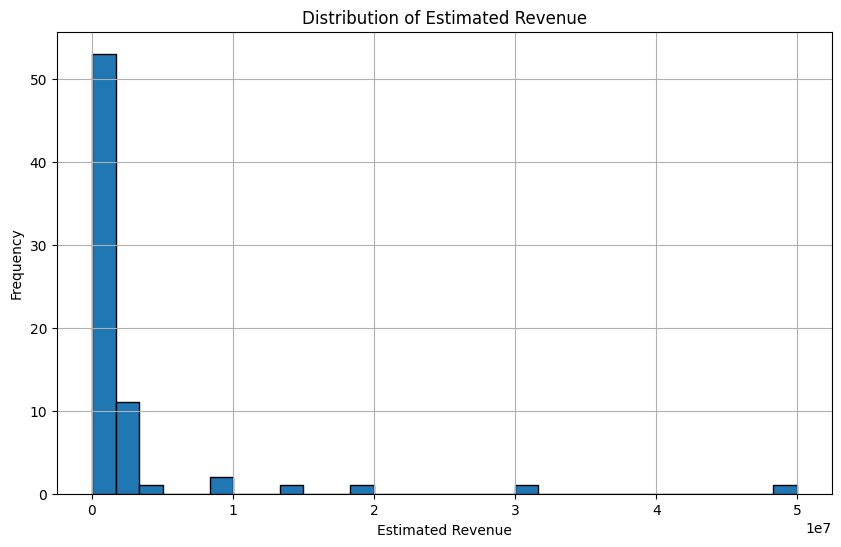

In [3]:
import pandas as pd
import numpy as np

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price', 'owners'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']
games_df = games_df[games_df['reviews'] > 0]

# Clean the owners column and extract the upper limit
def clean_owners(owners):
    try:
        return float(owners.split('..')[1].replace(',', ''))
    except (IndexError, ValueError):
        return np.nan

games_df['owners'] = games_df['owners'].apply(clean_owners)
games_df = games_df.dropna(subset=['owners'])  # Ensure there are no missing values in the owners column
games_df = games_df[games_df['owners'] > 0]  # Filter out games with zero owners

# Calculate the average review-to-download ratio using unique reviews
unique_review_ratio = games_df['reviews'].sum() / games_df['owners'].sum()
print(f"Average unique review-to-download ratio: {unique_review_ratio:.8f}")

# Estimate revenue using unique review ratio
games_df['estimated_revenue'] = games_df['owners'] * games_df['price']

# Ensure no zero values in estimated_revenue
games_df = games_df[games_df['estimated_revenue'] > 0]

# Calculate revenue quartiles
revenue_quartiles = pd.qcut(games_df['estimated_revenue'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Add quartile information to the dataframe
games_df['revenue_quartile'] = revenue_quartiles

# Calculate the revenue range for each quartile
revenue_range = games_df.groupby('revenue_quartile', observed=True)['estimated_revenue'].agg(['min', 'max']).reset_index()
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)

# Print each range individually
print("Estimated Revenue Ranges for Each Quartile:")
for index, row in revenue_range.iterrows():
    print(f"{row['revenue_quartile']}: {row['range']}")

# Visualize the distribution of estimated revenue
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(games_df['estimated_revenue'], bins=30, edgecolor='black')
plt.xlabel('Estimated Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Revenue')
plt.grid(True)
plt.show()


Average unique review-to-download ratio: 0.01006419
Estimated Revenue Ranges for Each Quartile:
Q1: $39,800 - $199,800
Q2: $219,800 - $499,500
Q3: $499,800 - $1,499,500
Q4: $1,998,000 - $49,950,000


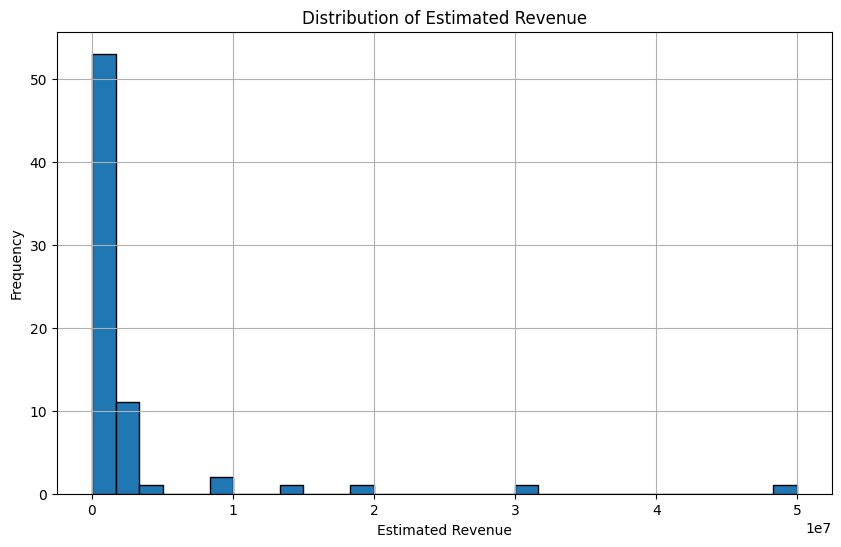

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price', 'owners'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']
games_df = games_df[games_df['reviews'] > 0]

# Clean the owners column and extract the upper limit
def clean_owners(owners):
    try:
        return float(owners.split('..')[1].replace(',', ''))
    except (IndexError, ValueError):
        return np.nan

games_df['owners'] = games_df['owners'].apply(clean_owners)
games_df = games_df.dropna(subset=['owners'])  # Ensure there are no missing values in the owners column
games_df = games_df[games_df['owners'] > 0]  # Filter out games with zero owners

# Calculate the average review-to-download ratio using unique reviews
unique_review_ratio = games_df['reviews'].sum() / games_df['owners'].sum()
print(f"Average unique review-to-download ratio: {unique_review_ratio:.8f}")

# Estimate revenue using unique review ratio
games_df['estimated_revenue'] = games_df['owners'] * games_df['price']

# Ensure no zero values in estimated_revenue
games_df = games_df[games_df['estimated_revenue'] > 0]

# Calculate revenue quartiles
revenue_quartiles = pd.qcut(games_df['estimated_revenue'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Add quartile information to the dataframe
games_df['revenue_quartile'] = revenue_quartiles

# Calculate the revenue range for each quartile
revenue_range = games_df.groupby('revenue_quartile', observed=True)['estimated_revenue'].agg(['min', 'max']).reset_index()
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)

# Print each range individually
print("Estimated Revenue Ranges for Each Quartile:")
for index, row in revenue_range.iterrows():
    print(f"{row['revenue_quartile']}: {row['range']}")

# Visualize the distribution of estimated revenue
plt.figure(figsize=(10, 6))
plt.hist(games_df['estimated_revenue'], bins=30, edgecolor='black')
plt.xlabel('Estimated Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Revenue')
plt.grid(True)
plt.show()



Average unique review-to-download ratio: 0.01006419

Estimated Revenue Ranges for Each Decile:
100-90%: $39,800 - $99,800
90-80%: $139,800 - $199,800
80-70%: $219,800 - $239,800
70-60%: $249,500 - $299,500
60-50%: $299,800 - $499,500
50-40%: $499,800 - $998,000
40-30%: $999,000 - $1,495,000
30-20%: $1,499,000 - $1,999,000
20-10%: $2,398,000 - $3,198,000
10-0%: $3,998,000 - $49,950,000


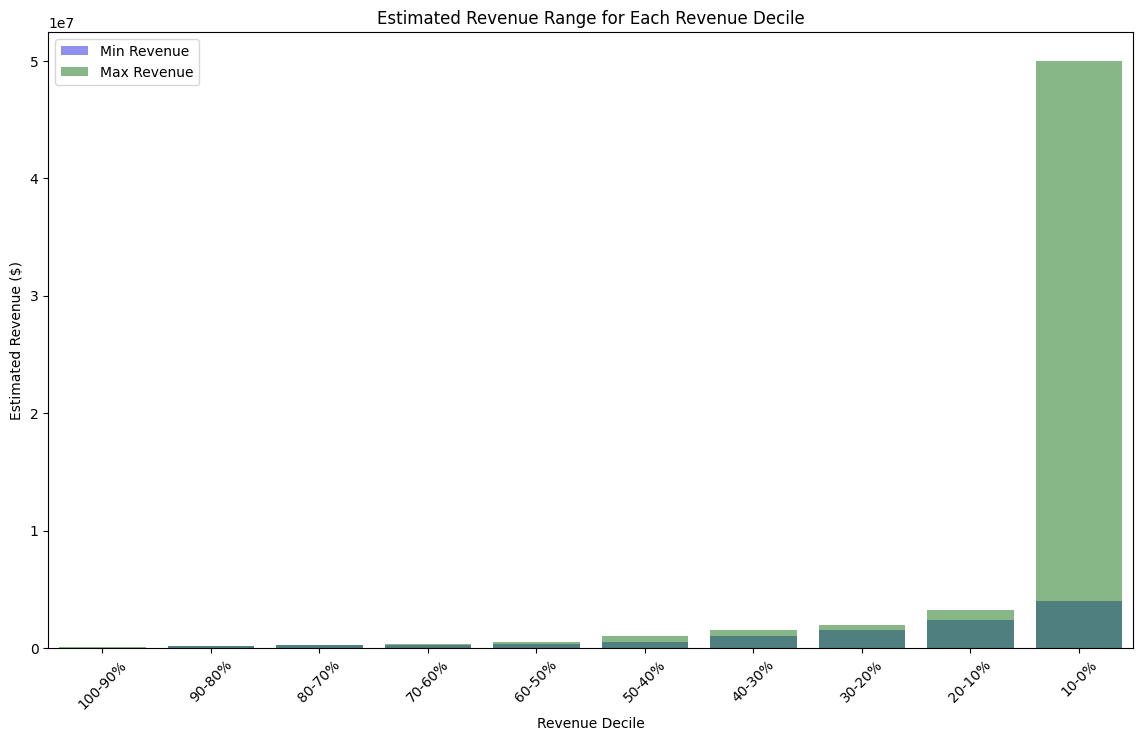

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price', 'owners'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']
games_df = games_df[games_df['reviews'] > 0]

# Clean the owners column and extract the upper limit
def clean_owners(owners):
    try:
        return float(owners.split('..')[1].replace(',', ''))
    except (IndexError, ValueError):
        return np.nan

games_df['owners'] = games_df['owners'].apply(clean_owners)
games_df = games_df.dropna(subset=['owners'])  # Ensure there are no missing values in the owners column
games_df = games_df[games_df['owners'] > 0]  # Filter out games with zero owners

# Calculate the average review-to-download ratio using unique reviews
unique_review_ratio = games_df['reviews'].sum() / games_df['owners'].sum()
print(f"Average unique review-to-download ratio: {unique_review_ratio:.8f}")

# Estimate revenue using unique review ratio
games_df['estimated_revenue'] = games_df['owners'] * games_df['price']

# Ensure no zero values in estimated_revenue
games_df = games_df[games_df['estimated_revenue'] > 0]

# Calculate revenue deciles (10% quantiles)
num_deciles = 10
games_df['revenue_decile'], bins = pd.qcut(games_df['estimated_revenue'], num_deciles, labels=False, retbins=True, duplicates='drop')

# Create appropriate labels for deciles
actual_num_deciles = len(bins) - 1
decile_labels = [f"{(10 - i)*10}-{(9 - i)*10}%" for i in range(actual_num_deciles)]
games_df['revenue_decile'] = pd.qcut(games_df['estimated_revenue'], actual_num_deciles, labels=decile_labels)

# Calculate the revenue range for each decile
revenue_range = games_df.groupby('revenue_decile', observed=True)['estimated_revenue'].agg(['min', 'max']).reset_index()
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)

# Print results for each revenue decile
print("\nEstimated Revenue Ranges for Each Decile:")
for index, row in revenue_range.iterrows():
    print(f"{row['revenue_decile']}: {row['range']}")

# Visualize the results
plt.figure(figsize=(14, 8))
sns.barplot(x=revenue_range['revenue_decile'], y=revenue_range['min'], color='blue', alpha=0.5, label='Min Revenue')
sns.barplot(x=revenue_range['revenue_decile'], y=revenue_range['max'], color='green', alpha=0.5, label='Max Revenue')
plt.xlabel('Revenue Decile')
plt.ylabel('Estimated Revenue ($)')
plt.title('Estimated Revenue Range for Each Revenue Decile')
plt.xticks(rotation=45)
plt.legend()
plt.show()



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the game data from the correct path
games_df = pd.read_csv('../data/indie_horror_games_data.csv')

# Data Cleaning
games_df.dropna(subset=['positive', 'negative', 'price', 'owners'], inplace=True)
games_df['positive'] = games_df['positive'].astype(int)
games_df['negative'] = games_df['negative'].astype(int)
games_df['price'] = games_df['price'] / 100  # Convert price to dollars

# Calculate the total number of reviews
games_df['reviews'] = games_df['positive'] + games_df['negative']
games_df = games_df[games_df['reviews'] > 0]

# Clean the owners column and extract the upper limit
def clean_owners(owners):
    try:
        return float(owners.split('..')[1].replace(',', ''))
    except (IndexError, ValueError):
        return np.nan

games_df['owners'] = games_df['owners'].apply(clean_owners)
games_df = games_df.dropna(subset=['owners'])  # Ensure there are no missing values in the owners column
games_df = games_df[games_df['owners'] > 0]  # Filter out games with zero owners

# Calculate the average review-to-download ratio using unique reviews
unique_review_ratio = games_df['reviews'].sum() / games_df['owners'].sum()
print(f"Average unique review-to-download ratio: {unique_review_ratio:.8f}")

# Estimate revenue using unique review ratio
games_df['estimated_revenue'] = games_df['owners'] * games_df['price']

# Ensure no zero values in estimated_revenue
games_df = games_df[games_df['estimated_revenue'] > 0]

# Remove duplicate entries based on a combination of columns
games_df = games_df.drop_duplicates(subset=['game_id', 'positive', 'negative', 'price'])  # Adjust 'game_id' to your unique identifier

# Verify the removal of duplicates
print(f"Number of unique entries: {games_df.shape[0]}")

# Calculate revenue deciles (10% quantiles)
num_deciles = 10
games_df['revenue_decile'], bins = pd.qcut(games_df['estimated_revenue'], num_deciles, labels=False, retbins=True, duplicates='drop')

# Create appropriate labels for deciles
actual_num_deciles = len(bins) - 1
decile_labels = [f"{(10 - i)*10}-{(9 - i)*10}%" for i in range(actual_num_deciles)]
games_df['revenue_decile'] = pd.qcut(games_df['estimated_revenue'], actual_num_deciles, labels=decile_labels)

# Calculate the revenue range for each decile
revenue_range = games_df.groupby('revenue_decile', observed=True)['estimated_revenue'].agg(['min', 'max']).reset_index()
revenue_range['min'] = revenue_range['min'].apply(lambda x: int(round(x)))
revenue_range['max'] = revenue_range['max'].apply(lambda x: int(round(x)))
revenue_range['range'] = revenue_range.apply(lambda row: f"${row['min']:,} - ${row['max']:,}", axis=1)

# Print results for each revenue decile
print("\nEstimated Revenue Ranges for Each Decile:")
for index, row in revenue_range.iterrows():
    print(f"{row['revenue_decile']}: {row['range']}")

# Visualize the results
plt.figure(figsize=(14, 8))
sns.barplot(x=revenue_range['revenue_decile'], y=revenue_range['min'], color='blue', alpha=0.5, label='Min Revenue')
sns.barplot(x=revenue_range['revenue_decile'], y=revenue_range['max'], color='green', alpha=0.5, label='Max Revenue')
plt.xlabel('Revenue Decile')
plt.ylabel('Estimated Revenue ($)')
plt.title('Estimated Revenue Range for Each Revenue Decile')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Average unique review-to-download ratio: 0.00918540


KeyError: Index(['game_id'], dtype='object')